In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('diabetes.csv')

In [12]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
df.shape

(768, 9)

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
standardized_df = pd.DataFrame(standardized_data, columns=df.columns)

In [20]:
standardized_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760,-0.732120
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111,1.365896
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847,-0.732120
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259,1.365896
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346,1.365896


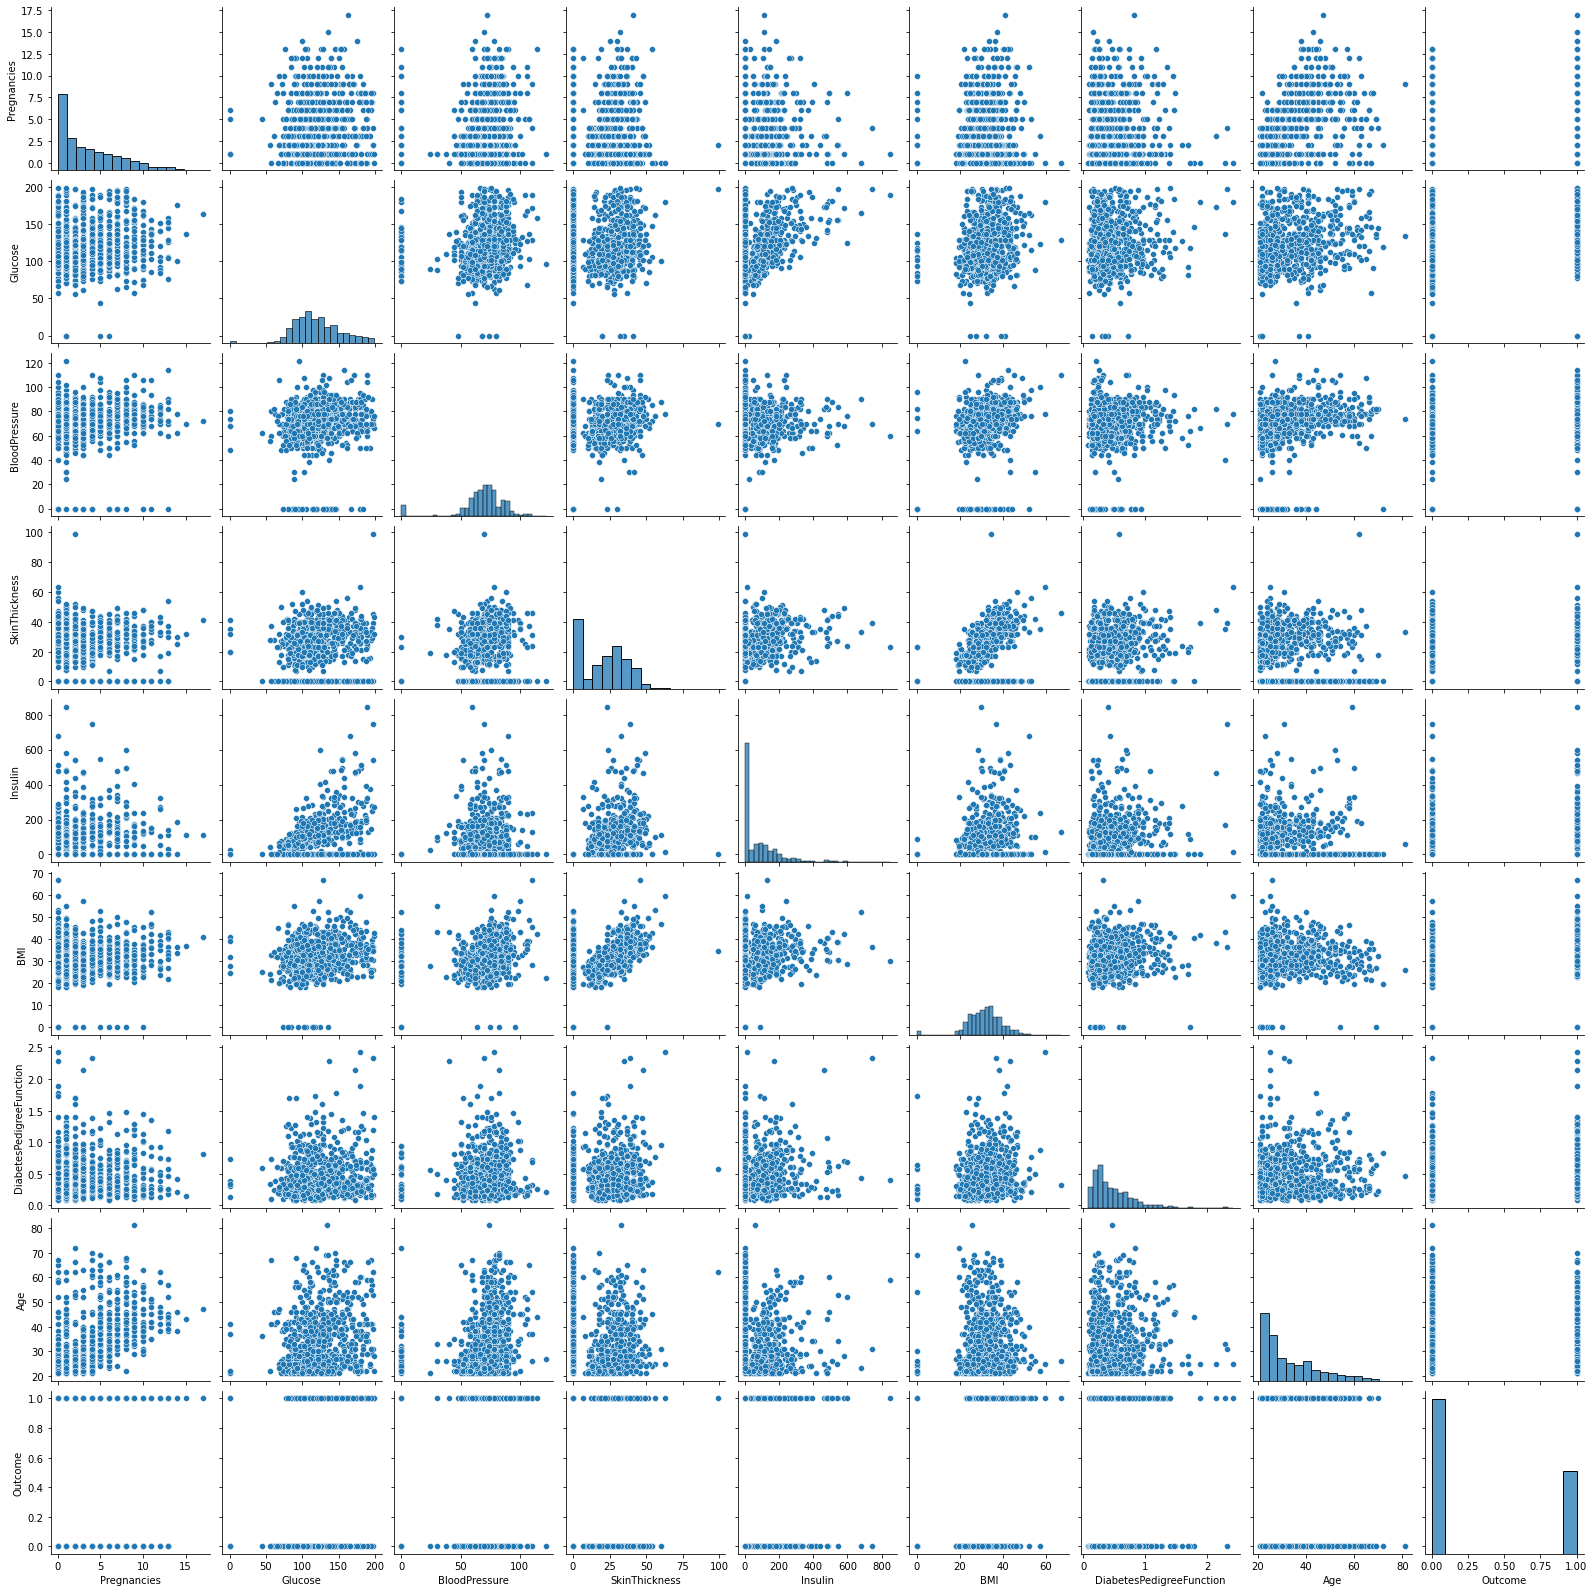

In [21]:
sns.pairplot(df)

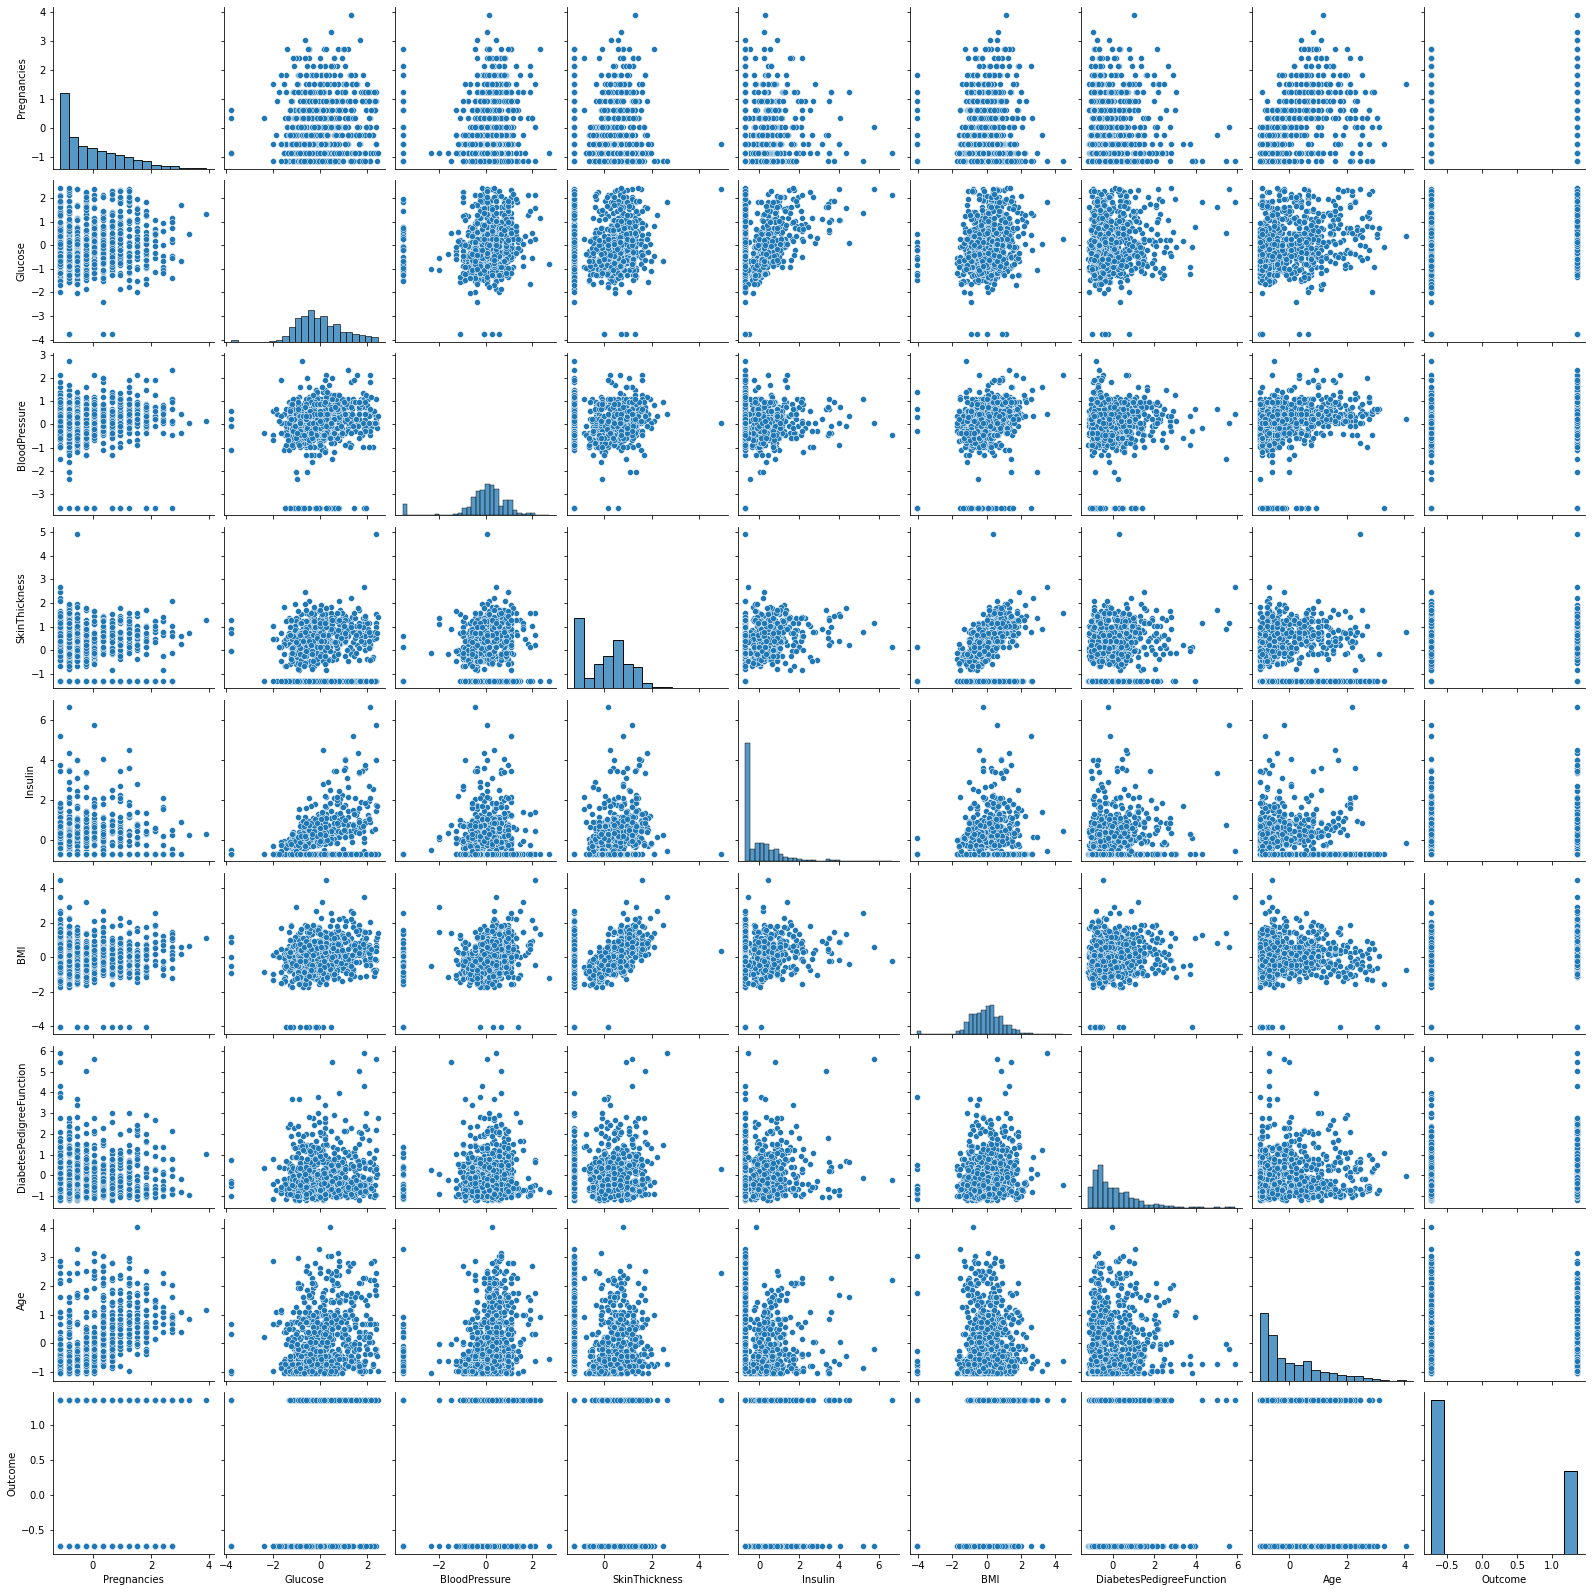

In [22]:
sns.pairplot(standardized_df)

<AxesSubplot:>

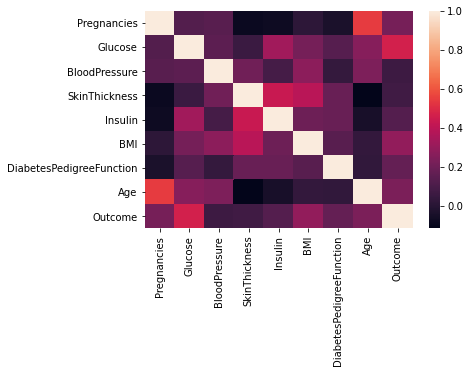

In [26]:
sns.heatmap(df.corr())

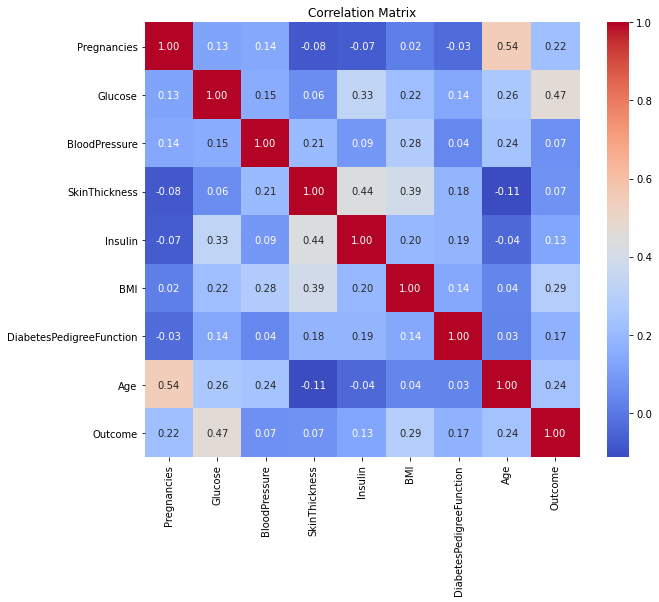

In [28]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
transformed_data = pca.fit_transform(standardized_data)
pca_df = pd.DataFrame(data=transformed_data, columns=['Principal Component 1 (PC1)', 'Principal Component 2 (PC2)'])

In [32]:
pca_df.head(5)

,Principal Component 1 (PC1),Principal Component 2 (PC2)
0,-1.756947,-1.111743
1,1.507421,0.559406
2,-0.650822,-1.929576
3,1.587398,1.065075
4,-2.483374,2.359563


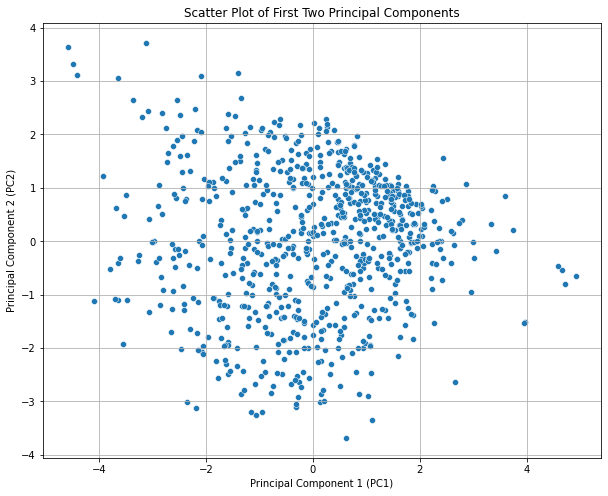

In [33]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1 (PC1)', y='Principal Component 2 (PC2)', data=pca_df)
plt.title('Scatter Plot of First Two Principal Components')
plt.grid()
plt.show()

In [43]:
from sklearn_extra.cluster import KMedoids
K = 3
kmedoids = KMedoids(n_clusters=K, metric='manhattan', random_state=42)
kmedoids.fit(pca_df)
labels = kmedoids.labels_

In [37]:
!pip install scikit-learn-extra

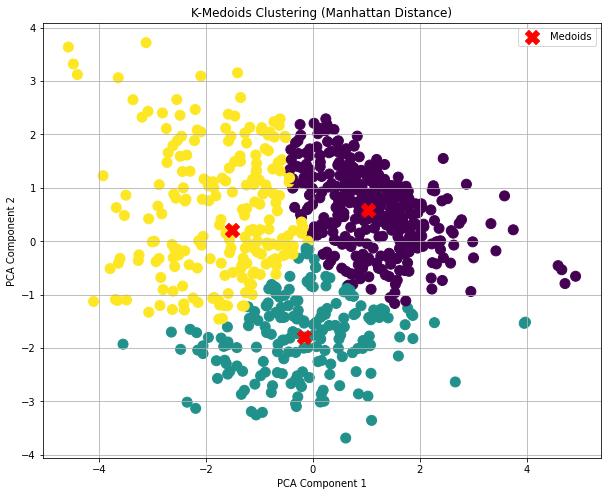

In [47]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=labels, cmap='viridis', s=100)
plt.title('K-Medoids Clustering (Manhattan Distance)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Plot medoids if they exist
if hasattr(kmedoids, 'cluster_centers_'):
    plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1],
                marker='X', color='red', s=200, label='Medoids')

plt.legend()
plt.grid()
plt.show()

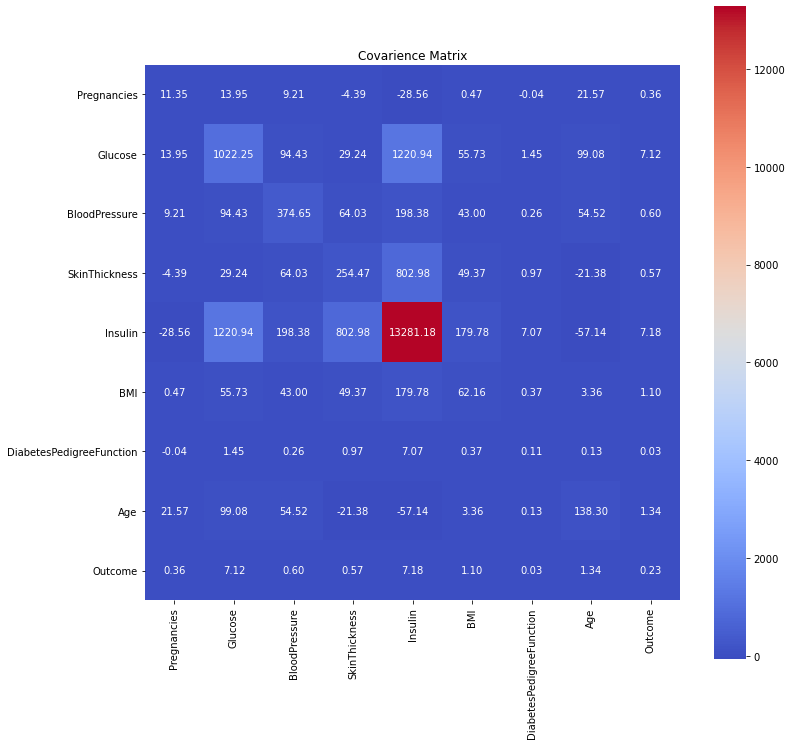

In [53]:
plt.figure(figsize=(12,12))
sns.heatmap(df.cov(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title("Covarience Matrix")
plt.show()